# GAN Synthetic Tabular Data Generation 
The dataset used has a very high level of imbalance, where the number of fraudulent transactions consititute less than 1% of the dataset's observations, generative adversarial networks are explored to upsample the minority class observations with their performances evaluated against non-deep learning sampling methods. 
We first check the environment setup. In particular which GAN architecture is use.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from rivalgan.pipeline import Pipeline

pipeline = Pipeline()
print(pipeline.config)

APP:Fraud
DATA_FOLDER:/home/ubuntu/insight/data/
PICKLED_DATA:creditcard.engineered.pkl
CACHE_FOLDER:/home/ubuntu/insight/cache/
LOG_FOLDER:/home/ubuntu/insight/logs/
MODEL_DIR:/home/ubuntu/insight/models/
DATA_FILE_NAME:creditcard.csv
MODEL_NAMES:['Logit', 'LinearSVC', 'RandomForest', 'xgb']
CORR_COLUMN_NAMES:['V13', 'V15', 'V22', 'V23', 'V26', 'Amount']
CLASS_NAME:Class
CLASS_COLUMN_NAME:['Class']
FILTERED_COLUMN_NAMES:['Class']
AUGMENTED_DATA_SIZE:500
TRAINING_INCR_STEP:1
TOTAL_TRAINING_STEPS:10
CLASSIFIER:SGDClassifier
GAN_NAME:VGAN
Z_DIM:100
Y_OUTPUT:1
SAMPLE:False
NUM_TRAINING_STEPS:10
SEED:42
REAL:0
FAKE:1
PCA:True



Read 
[Credit Card Fraud Detection data set](https://www.kaggle.com/mlg-ulb/creditcardfraud/home)

In [3]:
    data = pipeline.read_process_data()

Loading data from /home/ubuntu/insight/data/creditcard.engineered.pkl
Shape of the data=(284807, 31)
Head: 
        Time        V1        V2        V3        V4        V5        V6  \
0 -2.495776 -0.760474 -0.059825  1.778510  0.998741 -0.282036  0.366454   
1 -2.495776  0.645665  0.177226  0.108889  0.326641  0.047566 -0.064642   
2 -2.495729 -0.759673 -0.946238  1.240864  0.277228 -0.418463  1.425391   

         V7        V8        V9  ...         V21       V22       V23  \
0  0.234118  0.091669  0.343867  ...   -0.027953  0.392914 -0.259567   
1 -0.078505  0.077453 -0.237661  ...   -0.405091 -0.908272  0.228784   
2  0.775964  0.247431 -1.420257  ...    0.456138  1.094031  2.092428   

        V24       V25       V26       V27       V28    Amount  Class  
0  0.111992  0.253257 -0.396610  0.399584 -0.090140  1.130025      0  
1 -0.569582  0.329670  0.267951 -0.031113  0.069997 -1.138642      0  
2 -1.155079 -0.649083 -0.291089 -0.171222 -0.263354  1.695499      0  

[3 rows x 31 col

Train default classifier

In [4]:
pipeline.run_train_classifier()

Training 30 features with classifier SGDClassifier
Time elapsed to train:  0:00:00.34
Saving SGDClassifier in /home/ubuntu/insight/cache/SGDClassifier_Fraud.pkl
No sampler to train


What are the baseline scores?

In [5]:
pipeline.run_classifier_scores_report()

Baseline classifier SGDClassifier
Loading classifier SGDClassifier from file /home/ubuntu/insight/cache/SGDClassifier_Fraud.pkl
Predicting 30 features
Classification Report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      0.91      0.98      0.93      0.88     71089
          1       0.03      0.91      0.96      0.06      0.93      0.87       113

avg / total       1.00      0.96      0.91      0.98      0.93      0.88     71202

Accuracy score: 0.9578523075194517
Precision score: 0.911504424778761
Recall score: 0.03329023917259211
F1 score: 0.06423448705955721
Confusion Matrix:  
 [[68098  2991]
 [   10   103]] 



Generate 5,000 new rows of data for a maximum of 10 iterations

In [6]:
pipeline.run_train_gan()

Training VGAN total_steps=10, #generatedData=500
Step: 0
Generator loss: 0.6723080277442932 | discriminator loss: 1.9436471462249756 

Recording generated 500 samples for step=10
Model saved in path: /home/ubuntu/insight/models/VGAN_500_2018100623.ckpt
Time elapsed to train:  0:00:02.17
Saving fake data in path /home/ubuntu/insight/cache/2018100623_500_10_VGAN_Fraud_X.pkl


Print few rows of the augmented data distributions

In [7]:
gen_data = pipeline.last_iter()
gen_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.563610,-0.380136,-0.064229,-0.204172,-0.698525,0.197032,0.758621,0.750927,0.484635,-0.693346,...,-0.623267,-0.829086,0.933135,-0.759671,-0.559900,0.247170,0.487968,0.314935,0.587344,0.014653
1,0.207695,-0.542072,0.667857,-0.926216,-0.049630,0.228840,0.862305,0.427995,-0.105546,-0.172273,...,0.429743,-0.266999,0.838784,-0.311515,0.730204,0.442048,0.618297,0.142399,0.619197,0.762873
2,0.706028,-0.440854,-0.447805,-0.239118,0.011403,0.365792,0.932324,0.557133,0.258884,-0.410533,...,-0.183402,-0.573420,0.573686,-0.419606,-0.146129,0.342118,0.778697,0.140684,0.668652,0.714165


We can also look into the generate data distribution

In [8]:
gen_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.284124,-0.420235,0.136741,-0.494094,0.192446,0.285453,0.785245,0.596454,0.076704,-0.520100,...,-0.069245,-0.563017,0.722663,-0.527544,0.249604,0.368324,0.672665,0.353830,0.021355,0.613566
std,0.413123,0.326598,0.423881,0.349058,0.445649,0.388398,0.205100,0.290962,0.443563,0.342255,...,0.408496,0.296087,0.210380,0.307461,0.394210,0.365932,0.225954,0.387358,0.436231,0.262039
min,-0.850128,-0.955777,-0.859906,-0.987370,-0.833714,-0.757496,-0.475881,-0.637678,-0.926822,-0.987045,...,-0.914198,-0.984256,-0.312238,-0.985632,-0.899178,-0.738979,-0.359636,-0.820868,-0.933634,-0.442775
25%,-0.013087,-0.685596,-0.182393,-0.769647,-0.151171,0.029615,0.719076,0.443155,-0.251826,-0.783314,...,-0.398736,-0.806811,0.619219,-0.762858,-0.037139,0.124083,0.539111,0.108887,-0.323117,0.474899
50%,0.357031,-0.489897,0.128175,-0.577401,0.217115,0.343860,0.853678,0.677870,0.098405,-0.599954,...,-0.049423,-0.632959,0.773993,-0.597129,0.308876,0.441265,0.718159,0.424398,0.022531,0.667448
75%,0.624268,-0.196754,0.508434,-0.261424,0.574170,0.591822,0.918794,0.811719,0.446062,-0.357918,...,0.249090,-0.379129,0.879201,-0.344767,0.573387,0.660129,0.847668,0.664576,0.388099,0.822173
max,0.967953,0.695420,0.910797,0.591141,0.965054,0.966862,0.998856,0.973990,0.924311,0.679025,...,0.917377,0.429060,0.991904,0.517298,0.941002,0.962531,0.989182,0.952729,0.908428,0.970685


Reconfigure the pipeline on the fly

In [9]:
dargs = {'GEN_FILENAME':'REF', 
         'AUGMENTED_DATA_SIZE':100000, 
         'TOTAL_TRAINING_STEPS': 6300,
         'GAN_NAME':'VGAN'}
pipeline.set_configuration(dargs)

Loading classifier SGDClassifier from file /home/ubuntu/insight/cache/SGDClassifier_Fraud.pkl
Loading data for total_count=6300 from path /home/ubuntu/insight/cache/REF_100000_6300_VGAN_Fraud_X.pkl

 ############################################# BASELINE REPORT #############################################
Classification Report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.96      0.91      0.98      0.93      0.88     71089
          1       0.03      0.91      0.96      0.06      0.93      0.87       113

avg / total       1.00      0.96      0.91      0.98      0.93      0.88     71202

Accuracy score: 0.9578523075194517
Precision score: 0.911504424778761
Recall score: 0.03329023917259211
F1 score: 0.06423448705955721

 ############################################# GAN (DATA AUGMENTATION) REPORT #############################################
Classification Report: 
                    pre       rec       spe      

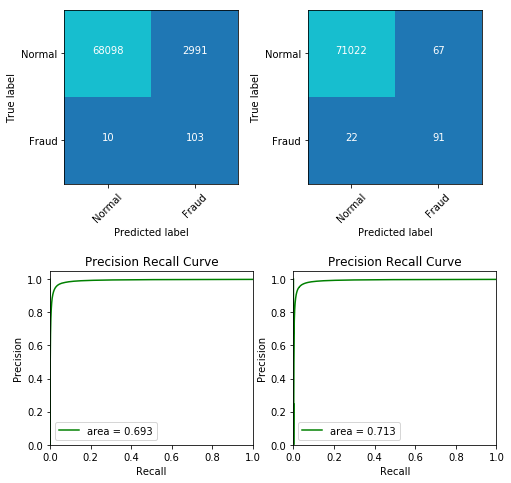

In [10]:
pipeline.compare_classifier_gan_scores()

Plot the initial and augmented data distributions. They should have similar shapes. 

explained variance ratio (first two components): [0.05822086 0.05604041]
Loading data for total_count=6300 from path /home/ubuntu/insight/cache/REF_100000_6300_VGAN_Fraud_X.pkl
explained variance ratio (first two components): [0.13590882 0.07935511]


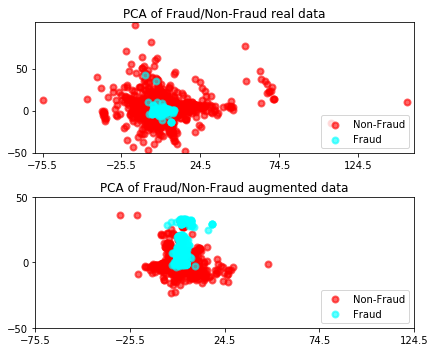

In [11]:
pipeline.generate_distribution_plots()

Doing cross validation is resource expensive, we return to a smaller data set

Be patient when running the next steps, they are taking a while!

In [12]:
dargs = {'GEN_FILENAME':'REF', 
         'AUGMENTED_DATA_SIZE':5000, 
         'TOTAL_TRAINING_STEPS': 6300,
         'GAN_NAME':'VGAN'}
pipeline.set_configuration(dargs)

In [ ]:
pipeline.compute_learning_curves()

Loading data for total_count=6300 from path /home/ubuntu/insight/cache/REF_5000_6300_VGAN_Fraud_X.pkl


To see if the SVM classifier benefits from the oversampling of the minority class, we plot the scores related to number of training examples (initial data plus the augmented data set)

In [13]:
dargs = {'GEN_FILENAME':'REF', 
         'AUGMENTED_DATA_SIZE':100000, 
         'TOTAL_TRAINING_STEPS': 6300,
         'GAN_NAME':'VGAN'}
pipeline.set_configuration(dargs)

Loading data for total_count=6300 from path /home/ubuntu/insight/cache/REF_100000_6300_VGAN_Fraud_X.pkl
Generating data for 10000
Generating data for 20000
Generating data for 30000
Generating data for 40000
Generating data for 50000
Generating data for 60000
Generating data for 70000
Generating data for 80000
Generating data for 90000
Generating data for 100000


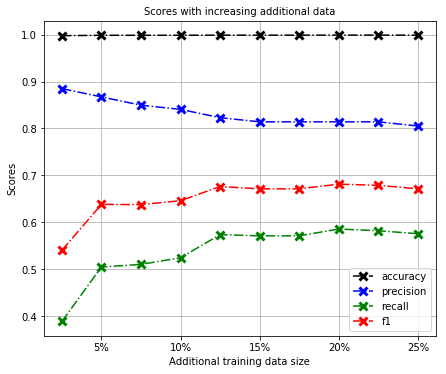

In [14]:
pipeline.plot_augmented_data_learning_curves()

We illustrate the influence of the balancing ratio on some toy data using a linear SVM classifier. Greater is the difference between the number of samples in each class, poorer are the classification results.
Plotting the decision boundaries for a random data set of 1000 samples of two features and three classes.
The boundaries are improved when the data is balanced with additional GAN data generated.

Create imbalanced random data set

In [15]:
pipeline = Pipeline()
pipeline.create_random_data_set()

samples=1000, features=2, classes=3
Class
0     13
1     55
2    932
Name: Class, dtype: int64


Use vanilla GAN, set the augmented data for each imbalanced class to 500 and set then number of steps to 100 for fast iteration cycle.

In [16]:
dargs = {'classifier': 'SVC', 'GAN_NAME': 'IWGAN', 'TOTAL_TRAINING_STEPS': 10, 'AUGMENTED_DATA_SIZE':500}
pipeline.set_configuration(dargs)

samples=1000, features=2, classes=3
Class
0     13
1     55
2    932
Name: Class, dtype: int64
Generating data for class=0
Training IWGAN total_steps=10, #generatedData=500
Step: 0
Generator loss: -0.4943113923072815 | discriminator loss: 9.665471076965332 

Recording generated 500 samples for step=10
Time elapsed to train:  0:00:00.73
Generating data for class=1
Training IWGAN total_steps=10, #generatedData=500
Step: 0
Generator loss: -0.500350832939148 | discriminator loss: 9.753211975097656 

Recording generated 500 samples for step=10
Time elapsed to train:  0:00:00.81
Class
0    513
1    555
2    932
Name: Class, dtype: int64


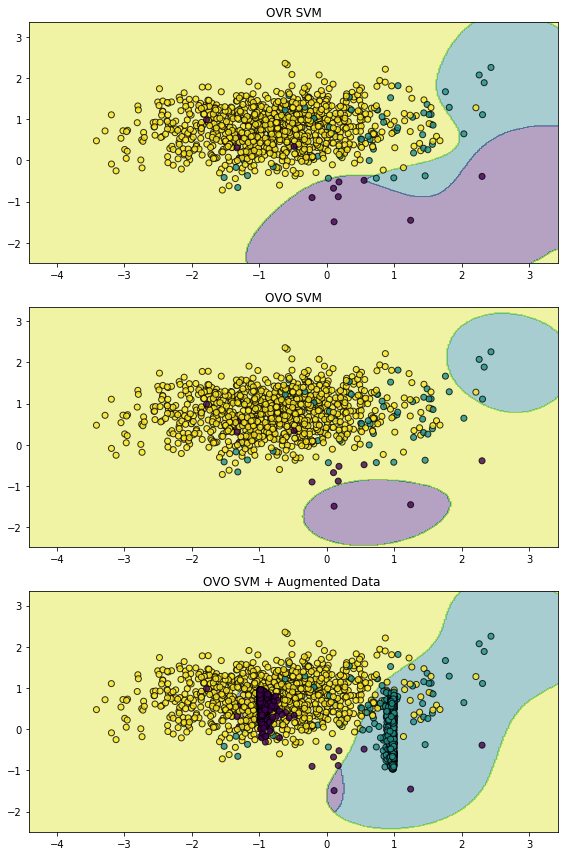

In [17]:
pipeline.plot_decision_boundaries_random_dataset()